In [131]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as sk_lin
import sklearn.svm as sk_svm
import sklearn.tree as sk_tree

In [44]:
def gen2d_circle(r, x0 = np.array([[0,0]]), num=100, dr_sigma=1):
    rs = np.exp(np.random.normal(np.log(r), dr_sigma, num)).reshape(num, 1)
    phis = np.array(np.random.uniform(0, 2*np.pi, num)).reshape(num, 1)
    return x0 + np.hstack([np.cos(phis)*rs, np.sin(phis)*rs])

def mark2d_circle(x, r, x0 = np.array([[0,0]]), uncertainty=0.1, prob=0.5):
    num = x.shape[0]
    unc = (np.random.uniform(0, 1, num) < uncertainty) * 1
    xt = x - x0
    r2 = r*r
    xd2 = [np.dot(p, p) for p in xt]
    return np.array([unc[i] * np.random.binomial(1, prob) + (1-unc[i]) * (xd2[i] < r2) for i in range(num)]).reshape(num, 1)

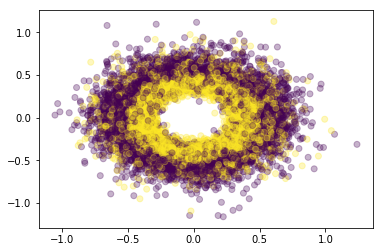

In [81]:
pts = gen2d_circle(0.5, num=10000, dr_sigma=0.25)
pmrks = mark2d_circle(pts, 0.5, uncertainty=0.5, prob=0.5)
plt.scatter(pts[:, 0], pts[:, 1], c=pmrks, alpha=0.3)

In [103]:
pts1 = np.hstack([pts, np.ones((pts.shape[0],1))])
pts2 = np.hstack([(pts[:,0]*pts[:,0]).reshape(pts.shape[0],1), (pts[:,0]*pts[:,1]).reshape(pts.shape[0],1), (pts[:,1]*pts[:,1]).reshape(pts.shape[0],1)])

In [104]:
# Logistic regression
logreg = sk_lin.LogisticRegression()
logreg.fit(pts1, pmrks.reshape(pmrks.shape[0]))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

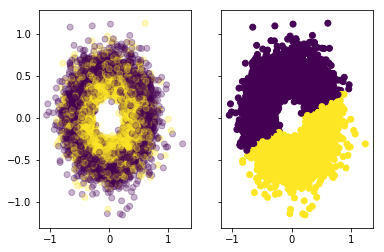

In [106]:
ylogreg = logreg.predict(pts1)
fig,(ax1,ax2)=plt.subplots(1,2,sharey=True)
ax1.scatter(pts[:, 0], pts[:, 1], c=pmrks, alpha=0.3)
ax2.scatter(pts[:, 0], pts[:, 1], c=ylogreg)

In [109]:
# Logistic regression 2-order
logreg2 = sk_lin.LogisticRegression()
logreg2.fit(np.hstack([pts1,pts2]), pmrks.reshape(pmrks.shape[0]))
ylogreg2 = logreg2.predict(np.hstack([pts1,pts2]))

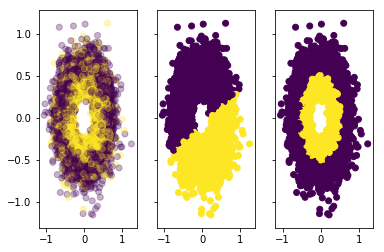

In [112]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True)
ax1.scatter(pts[:, 0], pts[:, 1], c=pmrks, alpha=0.3)
ax2.scatter(pts[:, 0], pts[:, 1], c=ylogreg)
ax3.scatter(pts[:, 0], pts[:, 1], c=ylogreg2)

In [119]:
svc1 = sk_svm.LinearSVC()
svc1.fit(pts1, pmrks.reshape(pmrks.shape[0]))
ysvc1 = svc1.predict(pts1)
svc1

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

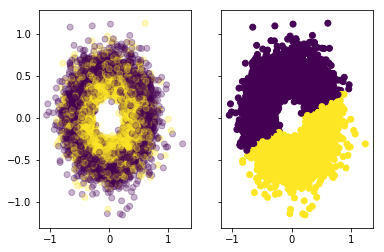

In [118]:
fig,(ax1,ax2)=plt.subplots(1,2,sharey=True)
ax1.scatter(pts[:, 0], pts[:, 1], c=pmrks, alpha=0.3)
ax2.scatter(pts[:, 0], pts[:, 1], c=ysvc1)

In [120]:
svc2 = sk_svm.OneClassSVM()
svc2.fit(pts1, pmrks.reshape(pmrks.shape[0]))

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.5, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

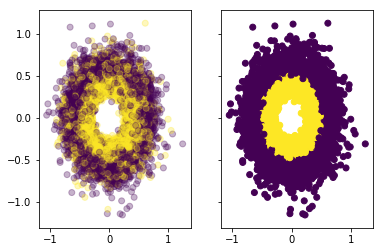

In [121]:
ysvc2 = svc2.predict(pts1)
fig,(ax1,ax2)=plt.subplots(1,2,sharey=True)
ax1.scatter(pts[:, 0], pts[:, 1], c=pmrks, alpha=0.3)
ax2.scatter(pts[:, 0], pts[:, 1], c=ysvc2)

In [122]:
svc3 = sk_svm.NuSVC()
svc3.fit(pts1, pmrks.reshape(pmrks.shape[0]))

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.5, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False)

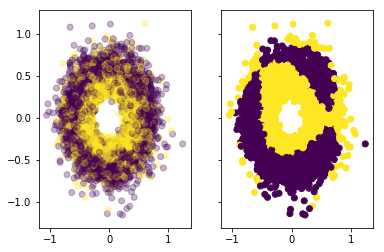

In [123]:
ysvc3 = svc3.predict(pts1)
fig,(ax1,ax2)=plt.subplots(1,2,sharey=True)
ax1.scatter(pts[:, 0], pts[:, 1], c=pmrks, alpha=0.3)
ax2.scatter(pts[:, 0], pts[:, 1], c=ysvc3)

In [125]:
svc4 = sk_svm.SVC()
svc4.fit(pts1, pmrks.reshape(pmrks.shape[0]))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

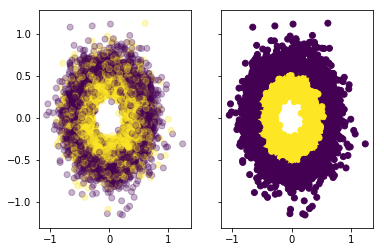

In [126]:
ysvc4 = svc4.predict(pts1)
fig,(ax1,ax2)=plt.subplots(1,2,sharey=True)
ax1.scatter(pts[:, 0], pts[:, 1], c=pmrks, alpha=0.3)
ax2.scatter(pts[:, 0], pts[:, 1], c=ysvc4)

In [129]:
svc5 = sk_svm.SVC(kernel='poly')
svc5.fit(pts1, pmrks.reshape(pmrks.shape[0]))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

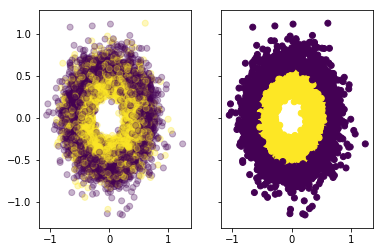

In [130]:
ysvc5 = svc5.predict(pts1)
fig,(ax1,ax2)=plt.subplots(1,2,sharey=True)
ax1.scatter(pts[:, 0], pts[:, 1], c=pmrks, alpha=0.3)
ax2.scatter(pts[:, 0], pts[:, 1], c=ysvc5)

In [132]:
dtc1 = sk_tree.DecisionTreeClassifier()
dtc1.fit(pts1, pmrks.reshape(pmrks.shape[0]))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

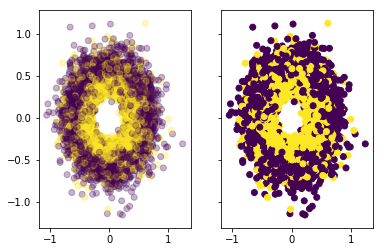

In [133]:
ydtc1 = dtc1.predict(pts1)
fig,(ax1,ax2)=plt.subplots(1,2,sharey=True)
ax1.scatter(pts[:, 0], pts[:, 1], c=pmrks, alpha=0.3)
ax2.scatter(pts[:, 0], pts[:, 1], c=ydtc1)